# Data preperation and implentation of ML models

Since we are developing two predictive models based on two aproches
    1. random forest
    2. Nueral network

we will prepare the dataset that optimize the performance for each.


In [2]:
import pandas as pd
import numbers as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam





In [103]:
data = pd.read_csv("data/bank-full.csv",delimiter=";")  
data = data.drop('duration', axis=1) 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


The duration variable isnt applicable in a practical prediction senario there for its removed form the data set

## Random forest

- Encoding the categorical data with one hot encoding as its the one most appropriate for random forest.
- For numerical data scaling isnt needed for random forest as its 

### label encoding for all categorical variables

In [105]:

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'poutcome', 'y']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [106]:

X = data.drop('y', axis=1)
y = data['y']


In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:


# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8916288842198385
Confusion Matrix:
 [[7835  117]
 [ 863  228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.66      0.21      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



### One hot encoding for non-binary categorical variables and label encoding for categorical variables

In [119]:
data = pd.read_csv('data/bank-full.csv',delimiter=";")
data = data.drop('duration', axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [120]:


# Define binary variables for label encoding
binary_cols = ['housing', 'default', 'loan', 'y']

# Apply Label Encoding to binary variables
encoder = LabelEncoder()
for col in binary_cols:
    data[col] = encoder.fit_transform(data[col])

# Define categorical variables for one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding to the specified columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8932876257879022
Confusion Matrix:
 [[7829  123]
 [ 842  249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.67      0.23      0.34      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



Due to the class imbalance issue the recall for the minority class (yes ) is low. this is a critical issue since the practical utility of the preditive model is to narrow down potential customers form a pool of customers. high number of false negatives would means missing out on potential revenue.


To moitigate that we can try oversampling and undersampling tecniques to see the potential difference

### Upsampling with ramdom sampling and smote

In [142]:
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [143]:
data = pd.read_csv('data/bank-full.csv',delimiter=";")
data = data.drop('duration', axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [144]:


# Define binary variables for label encoding
binary_cols = ['housing', 'default', 'loan', 'y']

# Apply Label Encoding to binary variables
encoder = LabelEncoder()
for col in binary_cols:
    data[col] = encoder.fit_transform(data[col])

# Define categorical variables for one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding to the specified columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

In [145]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
from sklearn.utils import resample


train_data = pd.concat([X_train, y_train], axis=1)


majority_class = train_data[train_data['y'] == 0]
minority_class = train_data[train_data['y'] == 1]

minority_class_oversampled = resample(minority_class,
                                      replace=True,  # Sample with replacement
                                      n_samples=len(majority_class),  # Match the majority class size
                                      random_state=42)


oversampled_data = pd.concat([majority_class, minority_class_oversampled])


X_train_ros = oversampled_data.drop('y', axis=1)
y_train_ros = oversampled_data['y']


rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_train_ros, y_train_ros)

# Evaluate the model
y_pred_ros = rf_ros.predict(X_test)
print("Random Oversampling Results with resample:")
print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))


Random Oversampling Results with resample:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7985
           1       0.53      0.30      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043

[[7698  287]
 [ 736  322]]


In [147]:


ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [148]:


# Train and evaluate the Random Forest model
print("Random Oversampling Results:")
rf_ros = RandomForestClassifier(random_state=42,n_estimators=200)
rf_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = rf_ros.predict(X_test)
print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))

print("\nSMOTE Results:")
rf_smote = RandomForestClassifier(random_state=42,n_estimators=200)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))


Random Oversampling Results:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.54      0.31      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043

[[7710  275]
 [ 730  328]]

SMOTE Results:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7985
           1       0.49      0.33      0.39      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.64      0.66      9043
weighted avg       0.87      0.88      0.87      9043

[[7627  358]
 [ 711  347]]


### Undersampling tecniques

In [149]:
data = pd.read_csv('data/bank-full.csv',delimiter=";")
data = data.drop('duration', axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [150]:

# Define binary variables for label encoding
binary_cols = ['housing', 'default', 'loan', 'y']

# Apply Label Encoding to binary variables
encoder = LabelEncoder()
for col in binary_cols:
    data[col] = encoder.fit_transform(data[col])

# Define categorical variables for one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding to the specified columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

In [151]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [152]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create and train a Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
brf.fit(X_train, y_train)

# Evaluate the model
y_pred_brf = brf.predict(X_test)
print("Balanced Random Forest Results:")
print(classification_report(y_test, y_pred_brf))
print(confusion_matrix(y_test, y_pred_brf))


Balanced Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7985
           1       0.39      0.58      0.47      1058

    accuracy                           0.84      9043
   macro avg       0.66      0.73      0.69      9043
weighted avg       0.88      0.84      0.86      9043

[[7017  968]
 [ 443  615]]


#### ensamble of random forests with unsersampling

In [158]:
# Handle class imbalance using bagging (undersample majority class)
def balanced_bagging(X, y, n_estimators=10):
    models = []
    for _ in range(n_estimators):
        # Combine X and y
        data = pd.concat([X, y], axis=1)

        # Separate majority and minority classes
        majority = data[data['y'] == 0]
        minority = data[data['y'] == 1]

        # Undersample majority class
        majority_downsampled = resample(
            majority,
            replace=False,
            n_samples=len(minority),  # Match minority class size
            random_state=np.random.randint(1000)
        )

        # Combine undersampled majority with minority
        balanced_data = pd.concat([majority_downsampled, minority])
                

        # Separate features and target
        X_balanced = balanced_data.drop('y', axis=1)
        y_balanced = balanced_data['y']
        

        # Train a random forest model on balanced data
        model = RandomForestClassifier(random_state=42,n_estimators=200)
        model.fit(X_balanced, y_balanced)
        
        models.append(model)
        

    return models

# Train models using balanced bagging
models = balanced_bagging(X_train, y_train, n_estimators=10)


In [159]:
# Predict with an ensemble approach
def predict_with_bagging(models, X):
    predictions = np.zeros((len(X), len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X)
    # Use majority voting
    final_predictions = np.round(np.mean(predictions, axis=1))
    return final_predictions

# Evaluate on test data
y_pred = predict_with_bagging(models, X_test)

In [160]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6449 1536]
 [ 346  712]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7985
           1       0.32      0.67      0.43      1058

    accuracy                           0.79      9043
   macro avg       0.63      0.74      0.65      9043
weighted avg       0.88      0.79      0.82      9043



## Nerual netwrok

In [163]:
df = pd.read_csv('data/bank-full.csv',delimiter=";")
df = df.drop('duration', axis=1)

### One hot encoding for all categorical data and no scaling or preprocesing on other 

/home/ruwantha/MEGA/IIT/ML/repos/mlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3431 - val_accuracy: 0.8904 - val_loss: 0.3042
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8937 - loss: 0.2943 - val_accuracy: 0.8900 - val_loss: 0.3021
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8958 - loss: 0.2834 - val_accuracy: 0.8904 - val_loss: 0.2979
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8946 - loss: 0.2860 - val_accuracy: 0.8904 - val_loss: 0.3004
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8979 - loss: 0.2790 - val_accuracy: 0.8905 - val_loss: 0.2962
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8963 - loss: 0.2816 - val_accuracy: 0.8906 - val_loss: 0.2957
Epoch 7/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8976 - loss: 0.2810 - val_accuracy: 0.8903 - val_loss: 0.2964
Epoch 8/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8970 - loss: 0.2789 - 

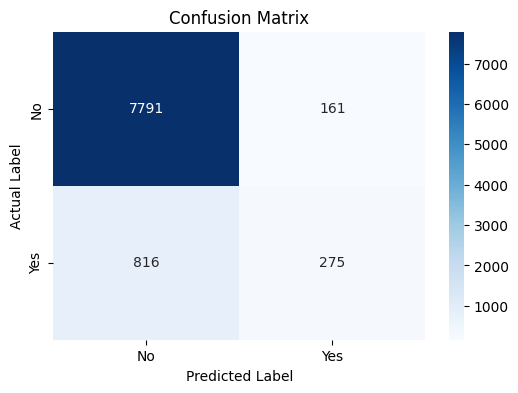

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7952
         Yes       0.63      0.25      0.36      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043



In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (replace 'your_data.csv' with your dataset file)


# Preprocessing
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
target = 'y'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

X = df.drop(target, axis=1)
y = df[target].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding for the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
